In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# Portfolio Project 
### Life Expectancy and GDP of selected countries

First, I am going to read and check the data

In [20]:
##Load Check Data

data = pd.read_csv("all_data.csv")

print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


The dataset has 4 columns. It looks like, that every Country comes with timeline values for Life Expectancy and GDP for years 2000-2015.

### Cleaning Data
Personally, I don't like the header of column 3 "Life expectancy at birth (years)". It is too long and may therefore create difficulties when working with this column in my analysis later on. I am going to rename it to "Life_Expectancy".

Also, I will replace "The United States of America" with "USA" to have better readibility in plots later on.

The remaining data looks good. The dataframe contains 4 columns and 96 rows (6 countries x 16 years). There are no null values.

In [22]:
# Shorten column name of Life expectancy
data.rename(columns={'Life expectancy at birth (years)': "Life_Expectancy"}, inplace=True)

# Replace "United States of America" with "USA"
data["Country"] = data["Country"].replace("United States of America", "USA")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Descriptive Statistics

I will start by looking at every country's Life Expectancy from 2000 to 2015 by creating a line plot for each country in a 3x2 matrix.

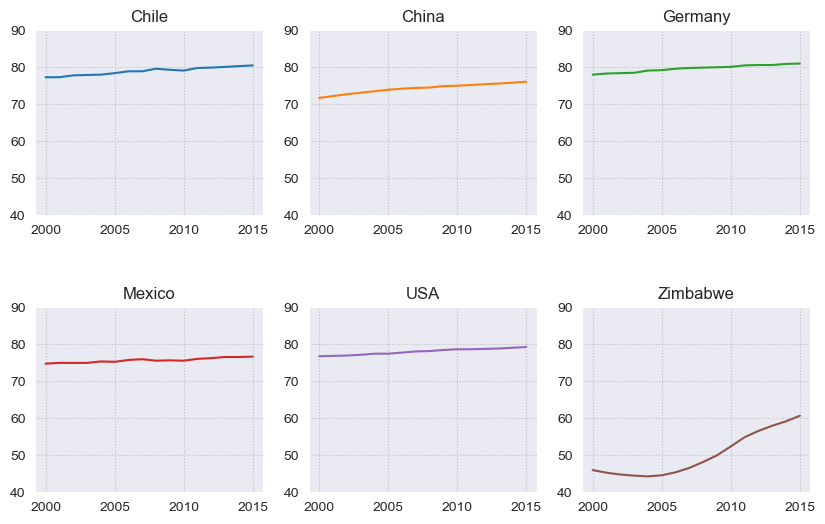

In [24]:
#Create variables with column and unique countries for easier processing

columns = data.columns.tolist()
countries = data.Country.unique()

#Create and style the plot
colors = plt.rcParams["axes.prop_cycle"]()
sns.set_style("darkgrid", {"grid.color": ".75", "grid.linestyle": ":"})
counter = 1
plt.figure(figsize=(10,6))

#for-loop running through the dataframe, creating a subplot for every country's Life Expectancy on a timeline from 2000-2015

for country in countries:

    c = next(colors)["color"]
    
    ax = plt.subplot(2,3,counter)
    plt.plot(data.Year[data.Country == country], data.Life_Expectancy[data.Country == country], color = c)
    plt.title(country)
    ax.set_ylim([40,90])
    counter += 1

plt.subplots_adjust(hspace=0.5)


We can see the following things:
- Every country's life expectancy has been developing positively (LE in 2015 is higher than in 2000)
- Except for Zimbabwe, development of Life Expectancy has been linear
- Zimbabwe's Life Expectancy development only started increasing from 2005 onwards, but therefore much faster than in other countries
- Chile and Mexico have encountered slight drops in Life Expectancy between 2008-2010

The Life Expectancy mean is different for every country. Though the Line Plot with its fixed y-axis (Life Expectancy in years) is doing a good job to compare the values across nations, it is not ideal to compare the distribution of values.

Before looking at the distribution of values, I want to see a summary of descriptive statistics elements for all countries:

In [150]:
#Descriptive Statistics

#Correlation between Life Expectancy and GDP

for country in countries:
    country_data = data[data['Country'] == country]

    print("---------")
    print(country)
    
    correlation = country_data[['GDP', 'Life_Expectancy']].corr().iloc[0, 1]
    print(f'Correlation coefficient GDP based on Life Expectancy:', round(correlation,2))
    
    average_life_expectancy = country_data['Life_Expectancy'].mean()
    print(f'Average Life Expectancy:', round(average_life_expectancy,2))

    max_life_expectancy = country_data['Life_Expectancy'].max()
    min_life_expectancy = country_data['Life_Expectancy'].min()
    print(f"Life Expectancy range: {min_life_expectancy} to {max_life_expectancy}")

    increase_life_expectancy = max_life_expectancy - min_life_expectancy
    print(f"Life Expectancy increase in years:", round(increase_life_expectancy,2))

---------
Chile
Correlation coefficient GDP based on Life Expectancy: 0.95
Average Life Expectancy: 78.94
Life Expectancy range: 77.3 to 80.5
Life Expectancy increase in years: 3.2
---------
China
Correlation coefficient GDP based on Life Expectancy: 0.91
Average Life Expectancy: 74.26
Life Expectancy range: 71.7 to 76.1
Life Expectancy increase in years: 4.4
---------
Germany
Correlation coefficient GDP based on Life Expectancy: 0.93
Average Life Expectancy: 79.66
Life Expectancy range: 78.0 to 81.0
Life Expectancy increase in years: 3.0
---------
Mexico
Correlation coefficient GDP based on Life Expectancy: 0.93
Average Life Expectancy: 75.72
Life Expectancy range: 74.8 to 76.7
Life Expectancy increase in years: 1.9
---------
USA
Correlation coefficient GDP based on Life Expectancy: 0.98
Average Life Expectancy: 78.06
Life Expectancy range: 76.8 to 79.3
Life Expectancy increase in years: 2.5
---------
Zimbabwe
Correlation coefficient GDP based on Life Expectancy: 0.97
Average Life Exp

To get a visual representation of the distribution of Life Expectancy in and across countries, I am going to boxplot the Life Expectancy of all 6 countries in ascending order. This way, a reader can quickly interpret and compare mean life expectancies among countries.

/var/folders/gc/cn0r60wn7j5bsfkl23_ym9_80000gn/T/ipykernel_51625/1137697145.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="Country", y="Life_Expectancy", data = data, order = mean_life_expectancy.index, palette = "winter")


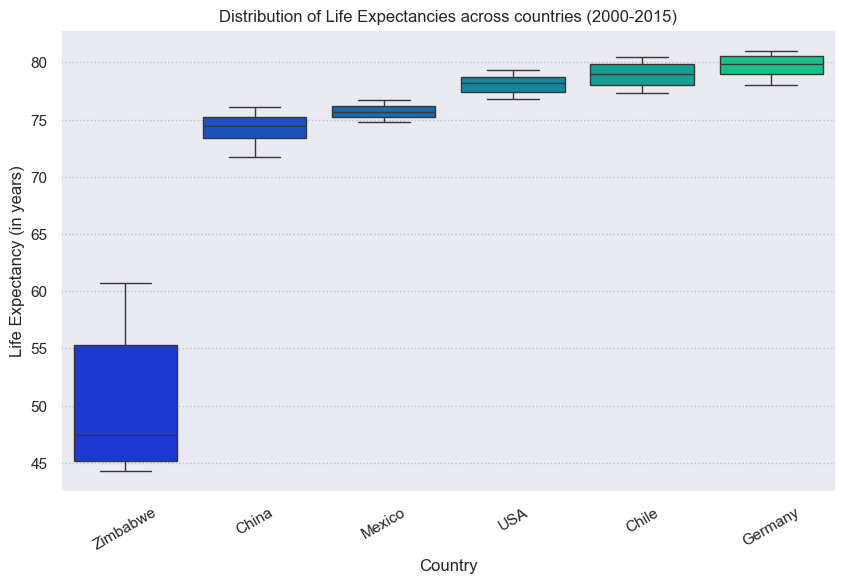

<Figure size 640x480 with 0 Axes>

In [103]:
#Create a mean LE variable to order the following boxplot
mean_life_expectancy = data.groupby('Country')['Life_Expectancy'].mean().sort_values()
sns.set_style("darkgrid", {"grid.color": ".75", "grid.linestyle": ":"})
plt.figure(figsize=(10,6))

#Boxplot of every countries Life Expectancy
sns.boxplot(x ="Country", y="Life_Expectancy", data = data, order = mean_life_expectancy.index, palette = "winter")
plt.title("Distribution of Life Expectancies across countries (2000-2015)")
plt.ylabel("Life Expectancy (in years)")
plt.xticks(rotation=30)
plt.show()
plt.clf()

What immediately sticks out is the Life Expectancy of Zimbabwe. It not only has the lowest expected LE, but also has the most dynamic in terms of range from lowest to highest over the course of 15 years.

# GDP

Similar to the Life Expectancy, I want to get a feel for the development of each countries GDP from 2000-2015. I am going to take a look at each country's economic wellbeing by analyzing a line plot.


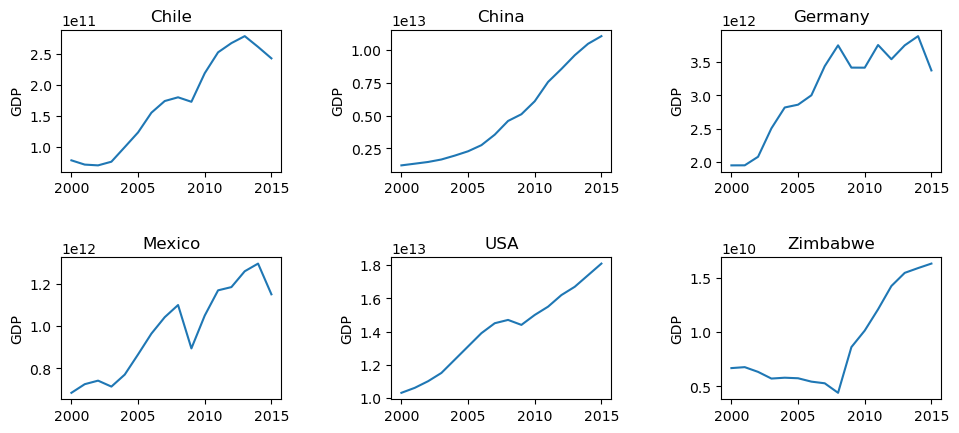

In [562]:
#for-loop to plot GDP Data for each country

counter = 1

for country in countries:
    plt.subplot(2,3,counter)
    plt.plot(data.Year[data.Country == country], data.GDP[data.Country == country])
    plt.title(country)
    plt.ylabel("GDP")
    counter += 1
plt.subplots_adjust(right = 1.5, hspace = 0.6, wspace = 0.5)

The GDP development is not nearly as linear as a country's development of Life Expectancy. Some countries seem to have had a strong and steady economic development (such as China, or USA with a little downturn in 2008/2009) from 2000-2015, whereas others have experienced a more volatile development (such as Germany from 2008 onwards). Zimbabwe as a developing country has been stuck in an economic recession from 2000-2008, but has remarkably turned the rudder around and has been seeing strong growth since 2009.

A pitfall of this 3x2 boxplot is the dimension of the GDP on the y-axis. It ranges from 10^10 to 10^13 - a huge difference. While this boxplot series still gives me a good indication of how dynamic a country's GDP has developed, it is not very suitable to compare the six countries at a glance in terms of absolute GDP numbers.

I will modify the boxplot and assign fixed values to the y-axis of every country's boxplot.

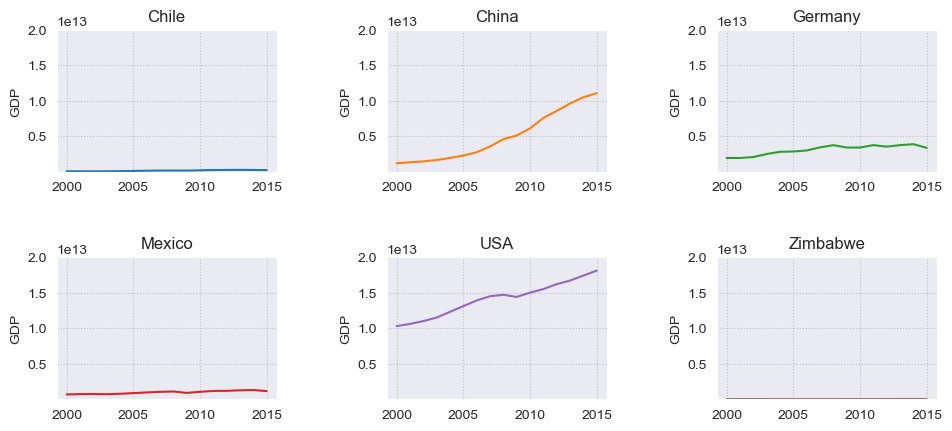

In [26]:
# Use the for loop to plot GDP Data for each country
colors = plt.rcParams["axes.prop_cycle"]()
counter = 1

for country in countries:

    c = next(colors)["color"]
    
    ax = plt.subplot(2,3,counter)
    plt.plot(data.Year[data.Country == country], data.GDP[data.Country == country], color = c)
    plt.title(country)
    plt.ylabel("GDP")
    ax.set_ylim([0.01*10**10,2.0*10**13])
    counter += 1
    
plt.subplots_adjust(right = 1.5, hspace = 0.6, wspace = 0.5)

Now the data reveals a whole new perspective. When comparing the overall size of economies from 2000-2015 based on GDP, the USA are by far the strongest economy. Only China is coming close to the size of the US, and is working hard to catch up.

Germany is the third largest economy measured in our dataframe by GDP.

The US and Germany would typically be classified as **"Industrial Nations"** - large and powerful economies, with steady but slow growth.

China in the past would have been classified as a **"Tiger State"** - an up and coming economy, smaller than a typical industrial nation, but with strong and dynamic growth. Judging by the size of its latest GDP in 2015, China has probably already earned itself the tag "Industrial Nation", and still manages to maintain a steep growth trajectory.

Zimbabwe would be a typical **"Developing Country"** - low GDP with volatile growth rates (meaning there is great potential, but reforms can send the economy either spiraling or flourishing). The GDP comapred to the US, Germany and China is so low, that the line plot is barely visible.

I expected Chile and Mexico to show traits of "Tiger States". Their size of GDP might support that argument, not so much their growth rates though. 

Let's look at a boxplot similar to the LE boxplot

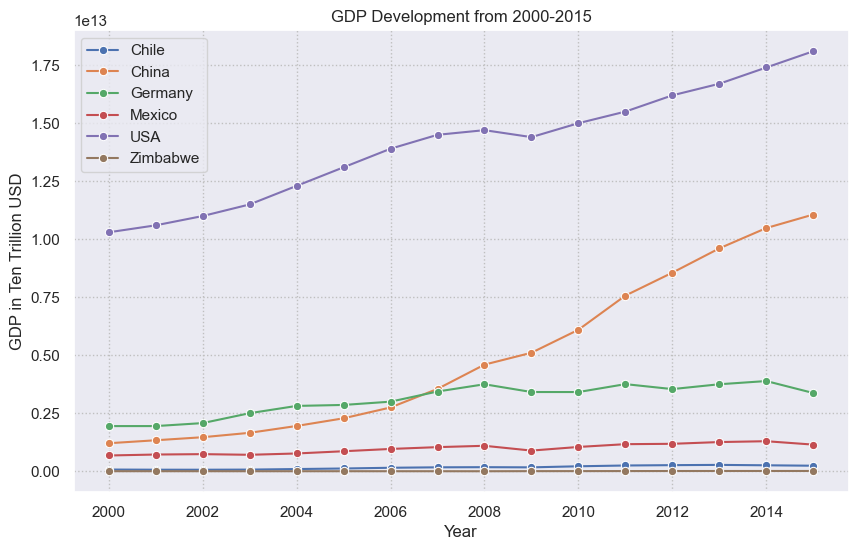

<Figure size 640x480 with 0 Axes>

In [85]:
#Boxplot for every country in its own figure
sns.set_style("darkgrid", {"grid.color": ".75", "grid.linestyle": ":"})

plt.figure(figsize=(10,6))
ax = plt.subplot()
sns.lineplot(x="Year", y="GDP", hue="Country", data = data, marker = "o")
plt.title("GDP Development from 2000-2015")
plt.ylabel ("GDP in Ten Trillion USD")
plt.legend(loc = 0)


plt.show()
plt.clf()

/var/folders/gc/cn0r60wn7j5bsfkl23_ym9_80000gn/T/ipykernel_51625/165808872.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x ="Country", y="GDP", data = data, order = mean_GDP.index, palette = "winter")


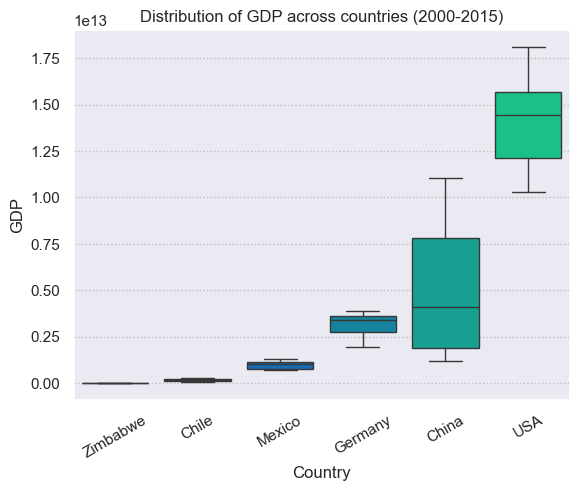

<Figure size 640x480 with 0 Axes>

In [89]:
#Create a mean GDP variable to order the following boxplot
mean_GDP = data.groupby('Country')['GDP'].mean().sort_values()

#Boxplot of every countries Life Expectancy
sns.set_style("darkgrid", {"grid.color": ".75", "grid.linestyle": ":"})

sns.boxplot(x ="Country", y="GDP", data = data, order = mean_GDP.index, palette = "winter")
plt.title("Distribution of GDP across countries (2000-2015)")
plt.ylabel("GDP")
plt.xticks(rotation=30)
plt.show()
plt.clf()

Interesting insights that are revealed:
- The USA is the strongest economy
- China has developed most dynamically over the last 15 years
- Zimbabwe has a very small economy, but strong growth rates
- Chile, Mexico and Germany have developed moderately over the last 15 years

Now let's look at the correlation between Life Expectancy and GDP for each country in each yea between 2000-2015.

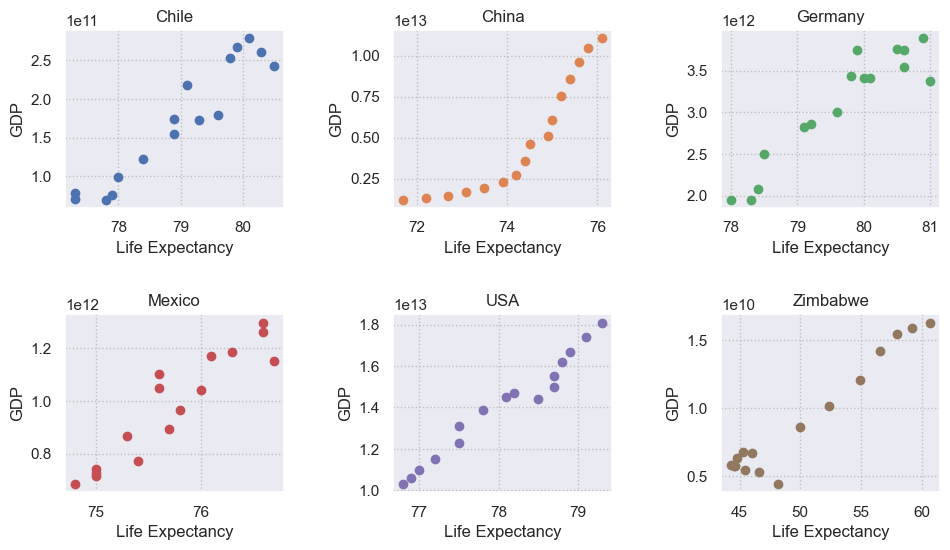

In [117]:
sns.set_style("darkgrid", {"grid.color": ".75", "grid.linestyle": ":"})
plt.figure(figsize=(10,6))
colors = plt.rcParams["axes.prop_cycle"]()

counter = 1

for country in countries:

    c = next(colors)["color"]
    
    plt.subplot(2,3,counter)
    plt.scatter(data.Life_Expectancy[data.Country == country], data.GDP[data.Country == country], marker = "o", color = c)
    plt.title(country)
    plt.ylabel("GDP")
    plt.xlabel("Life Expectancy")
    counter += 1
plt.subplots_adjust(right = 1, hspace = 0.6, wspace = 0.5)

## Bonus
As a business professional having worked in finance, I am interested in seeing an economy's yearly growth rates (YoY GDP growth).

I will use a for loop to run through each country's GDP data to calculate these growth rates.

In [40]:
# Create GDP growth data for GERMANY

GDP_Germany = list(data.GDP[data.Country == "Germany"])

GDP_Germany_steps = []
GDP_Germany_steps_pct = []

a = 0
b = 1

for i in GDP_Germany:
    if b < 16:
        GDP_Germany_steps.append(GDP_Germany[b] - GDP_Germany[a])
        GDP_Germany_steps_pct.append((GDP_Germany[b] - GDP_Germany[a]) / GDP_Germany[a])
        a += 1
        b += 1
    else: break

print(GDP_Germany_steps)
print(GDP_Germany_steps_pct)


[700000000.0, 128490000000.0, 426590000000.0, 313520000000.0, 42160000000.0, 141040000000.0, 437500000000.0, 312420000000.0, -334360000000.0, -920000000.0, 340610000000.0, -213720000000.0, 208530000000.0, 138100000000.0, -515000000000.0]
[0.00035898356368112, 0.06587035090867147, 0.20517617861231086, 0.125121222158812, 0.014954331825840207, 0.04929038481028584, 0.14571433329447617, 0.09082108751580692, -0.08910635145254865, -0.00026916246587926896, 0.09967838131275442, -0.05687521622268941, 0.05884062551143065, 0.036802033838683974, -0.13236998825376997]


In [42]:
# Create GDP growth data for CHILE

GDP_Chile = list(data.GDP[data.Country == "Chile"])

GDP_Chile_steps = []
GDP_Chile_steps_pct = []

a = 0
b = 1

for i in GDP_Chile:
    if b < 16:
        GDP_Chile_steps.append(GDP_Chile[b] - GDP_Chile[a])
        GDP_Chile_steps_pct.append((GDP_Chile[b] - GDP_Chile[a]) / GDP_Chile[a])
        a += 1
        b += 1
    else: break

print(GDP_Chile_steps)
print(GDP_Chile_steps_pct)


[-6881008192.0, -1243112525.0, 5906648405.0, 23566933018.0, 23754607142.0, 31823000000.0, 18818000000.0, 6032000000.0, -7249000000.0, 46149000000.0, 33714000000.0, 14870000000.0, 11262000000.0, -17394000000.0, -18472000000.0]
[-0.08837562050460564, -0.01751357927208464, 0.0846991464544582, 0.3115528172276685, 0.23943668055019204, 0.2587972187207742, 0.12157273173631031, 0.03474534290289506, -0.0403533773477772, 0.2677026956476341, 0.15427065315871838, 0.05894898752041609, 0.04216051092759114, -0.062482039197655034, -0.0707766581095061]


In [44]:
# Create GDP growth data for ZIMBABWE

GDP_Zimbabwe = list(data.GDP[data.Country == "Zimbabwe"])

GDP_Zimbabwe_steps = []
GDP_Zimbabwe_steps_pct = []

a = 0
b = 1

for i in GDP_Zimbabwe:
    if b < 16:
        GDP_Zimbabwe_steps.append(GDP_Zimbabwe[b] - GDP_Zimbabwe[a])
        GDP_Zimbabwe_steps_pct.append((GDP_Zimbabwe[b] - GDP_Zimbabwe[a]) / GDP_Zimbabwe[a])
        a += 1
        b += 1
    else: break

print(GDP_Zimbabwe_steps)
print(GDP_Zimbabwe_steps_pct)


[87427100.0, -435268300.0, -614524600.0, 78006600.0, -50383200.0, -311318700.0, -151946400.0, -876247300.0, 4205870808.0, 1520286102.0, 1956591039.0, 2144039503.0, 1209278407.0, 439280577.0, 413618571.0]
[0.013068408684682845, -0.06422363776989079, -0.09689582487007019, 0.013619441245795484, -0.008678381887386493, -0.054093320437435595, -0.027911331525130943, -0.16558117205224593, 0.9524804993669411, 0.17633510668972532, 0.1929223135546607, 0.17721603761351146, 0.08490638825118292, 0.0284291453421507, 0.02602839906020665]


In [60]:
# Create GDP growth data for CHINA

GDP_China = list(data.GDP[data.Country == "China"])

GDP_China_steps = []
GDP_China_steps_pct = []

a = 0
b = 1

for i in GDP_China:
    if b < 16:
        GDP_China_steps.append(GDP_China[b] - GDP_China[a])
        GDP_China_steps_pct.append((GDP_China[b] - GDP_China[a]) / GDP_China[a])
        a += 1
        b += 1
    else: break

print(GDP_China_steps)
print(GDP_China_steps_pct)


[128050000000.0, 131150000000.0, 189740000000.0, 295060000000.0, 330620000000.0, 466160000000.0, 800050000000.0, 1046030000000.0, 511740000000.0, 990670000000.0, 1471930000000.0, 988000000000.0, 1046670000000.0, 875180000000.0, 582300000000.0]
[0.10570850703760268, 0.0979169777512319, 0.12902655469042196, 0.17771594119099676, 0.16908481857467972, 0.20392218620541827, 0.290702110728781, 0.29447550518273286, 0.11129113285387139, 0.19387078151449622, 0.2412754769187394, 0.13047124152366113, 0.12226667679062678, 0.09109607149622888, 0.05555025566664123]


In [66]:
# Create GDP growth data for MEXICO

GDP_Mexico = list(data.GDP[data.Country == "Mexico"])

GDP_Mexico_steps = []
GDP_Mexico_steps_pct = []

a = 0
b = 1

for i in GDP_Mexico:
    if b < 16:
        GDP_Mexico_steps.append(GDP_Mexico[b] - GDP_Mexico[a])
        GDP_Mexico_steps_pct.append((GDP_Mexico[b] - GDP_Mexico[a]) / GDP_Mexico[a])
        a += 1
        b += 1
    else: break

print(GDP_Mexico_steps)
print(GDP_Mexico_steps_pct)


[41056000000.0, 16856000000.0, -28276000000.0, 56984000000.0, 96078000000.0, 98935000000.0, 78189000000.0, 57810000000.0, -206331000000.0, 156181000000.0, 120060000000.0, 15410000000.0, 75380000000.0, 36480000000.0, -146200000000.0]
[0.060054296948137055, 0.02325915132247097, -0.038130427746911916, 0.0798896372272475, 0.1247332097399866, 0.1141980224990939, 0.08100128356406062, 0.05540168859670139, -0.18735562254830743, 0.17451385497944574, 0.11421993473690219, 0.013157557697726243, 0.06352604078880836, 0.028906955736224028, -0.1125949201361613]


In [64]:
# Create GDP growth data for USA

GDP_USA = list(data.GDP[data.Country == "USA"])

GDP_USA_steps = []
GDP_USA_steps_pct = []

a = 0
b = 1

for i in GDP_USA:
    if b < 16:
        GDP_USA_steps.append(GDP_USA[b] - GDP_USA[a])
        GDP_USA_steps_pct.append((GDP_USA[b] - GDP_USA[a]) / GDP_USA[a])
        a += 1
        b += 1
    else: break

print(GDP_USA_steps)
print(GDP_USA_steps_pct)


[300000000000.0, 400000000000.0, 500000000000.0, 800000000000.0, 800000000000.0, 800000000000.0, 600000000000.0, 200000000000.0, -300000000000.0, 600000000000.0, 500000000000.0, 700000000000.0, 500000000000.0, 700000000000.0, 700000000000.0]
[0.02912621359223301, 0.03773584905660377, 0.045454545454545456, 0.06956521739130435, 0.06504065040650407, 0.061068702290076333, 0.04316546762589928, 0.013793103448275862, -0.02040816326530612, 0.041666666666666664, 0.03333333333333333, 0.04516129032258064, 0.030864197530864196, 0.041916167664670656, 0.040229885057471264]


[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]


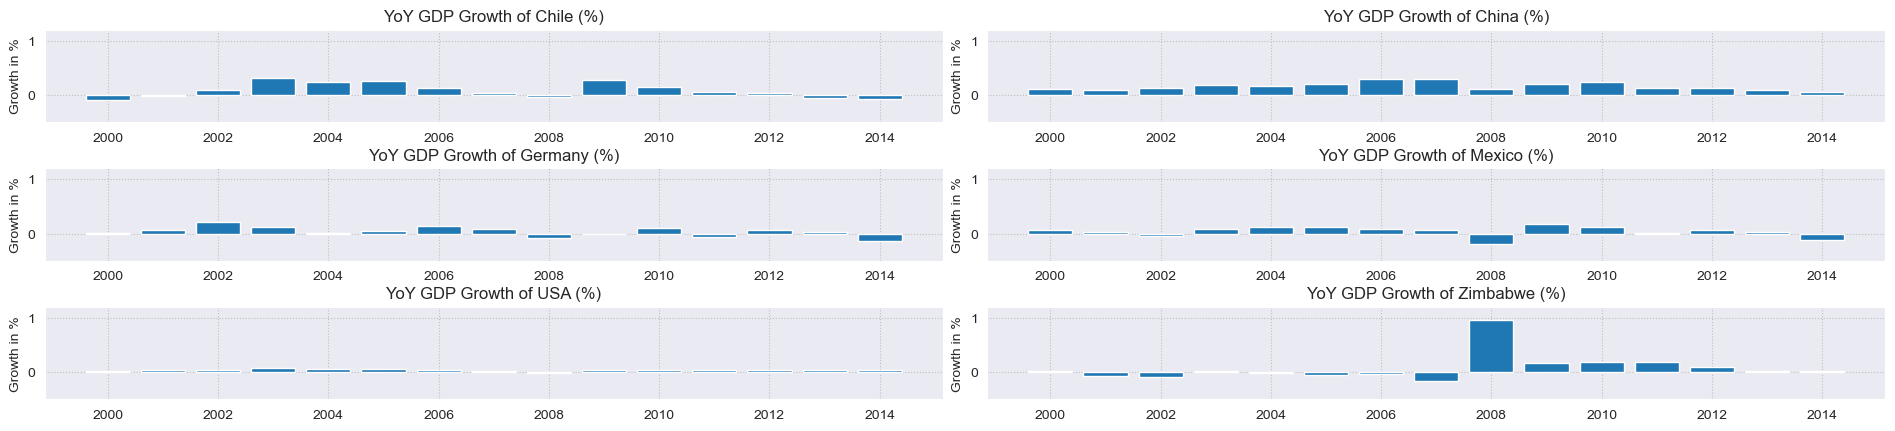

In [80]:
# Create x-Axis with years 2000-2014 (pop 2015)
x_years = list(data.Year.unique())
x_years.pop()
print(x_years)

ax = plt.subplot(3,2,1)
plt.bar(x_years, GDP_Chile_steps_pct)
plt.title("YoY GDP Growth of Chile (%)")
ax.set_ylabel("Growth in %")
ax.set_ylim([-0.5,1.2])

ax = plt.subplot(3,2,2)
plt.bar(x_years, GDP_China_steps_pct)
plt.title("YoY GDP Growth of China (%)")
ax.set_ylabel("Growth in %")
ax.set_ylim([-0.5,1.2])

ax = plt.subplot(3,2,3)
plt.bar(x_years, GDP_Germany_steps_pct)
plt.title("YoY GDP Growth of Germany (%)")
ax.set_ylabel("Growth in %")
ax.set_ylim([-0.5,1.2])

ax = plt.subplot(3,2,4)
plt.bar(x_years, GDP_Mexico_steps_pct)
plt.title("YoY GDP Growth of Mexico (%)")
ax.set_ylabel("Growth in %")
ax.set_ylim([-0.5,1.2])

ax = plt.subplot(3,2,5)
plt.bar(x_years, GDP_USA_steps_pct)
plt.title("YoY GDP Growth of USA (%)")
ax.set_ylabel("Growth in %")
ax.set_ylim([-0.5,1.2])

ax = plt.subplot(3,2,6)
plt.bar(x_years, GDP_Zimbabwe_steps_pct)
plt.title("YoY GDP Growth of Zimbabwe (%)")
ax.set_ylabel("Growth in %")
ax.set_ylim([-0.5,1.2])

plt.subplots_adjust(right=3, hspace=0.5, wspace=0.05)


This boxplot showing YoY GDP Growth rates nicely visualizes, what previous data analysis has already indicated. China has seen consistent yearly growth rates, considerably higher than e.g. those of the USA.

Germany has volatile growth rates, with strong years followed by weaker ones and sometimes even negative growth e.g. in 2008 and 2014.

Comparing the two Tiger States Chile and Mexico shows, that Chile up until 2008 has had stronger growth rates than Mexico, but Mexico seemed to have down it's homework ever since the financial crisis and has outperformed Chile until 2013.

The highest yearly growth rate in the entire dataset can be located in Zimbabwe's GDP in year 2008 with nearly 1%. One explanation might be the effects of the 2008 financial crisis rippling Industrial Nations and investors pulling their investments from "safe havens" and turning to Developing Countries in search of financial return.